In [38]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. xxx

In [45]:
DNV_Muts = pd.read_csv("../dat/genes/SPARK/CodingDNVs.txt", delimiter="\t")

In [46]:
SPARK_DNV = DNV_Muts[DNV_Muts["Cohort"]=="SPARK"]
print(SPARK_DNV.shape)

(13755, 67)


In [48]:
SPARK_DNV.to_csv("../dat/genes/SPARK/ASD_OnlySPARK_DNVs.txt", sep="\t", index=False)

In [41]:
DNV_SP = pd.read_csv("../dat/genes/SPARK/SampTable.txt", delimiter="\t")

In [42]:
DNV_SP.head(2)

,Cohort,FamID,FamType,IID,Sex,Pheno,ID
0,ASC,UCD_11791,Simplex,002-09-110644,Male,Affected,No
1,ASC,UCD_10455,Multiplex,003-05-102508,Female,Affected,No


In [44]:
SPARK_SP = DNV_SP[DNV_SP["Cohort"]=="SPARK"]
print(SPARK_SP.shape)

(10097, 7)


In [9]:
SPARK_SP[SPARK_SP["Pheno"]=="Affected"]

,Cohort,FamID,FamType,IID,Sex,Pheno,ID
8109,SPARK,SF0000027,Multiplex,SP0000027,Male,Affected,No
8110,SPARK,SF0000027,Multiplex,SP0000034,Male,Affected,No
8111,SPARK,SF0000035,Simplex,SP0000035,Male,Affected,No
8112,SPARK,SF0000027,Multiplex,SP0000063,Female,Affected,No
8113,SPARK,SF0000076,Simplex,SP0000076,Male,Affected,No
...,...,...,...,...,...,...,...
18199,SPARK,SF0153060,Multiplex,SP0153060,Male,Affected,No
18200,SPARK,SF0153750,Simplex,SP0153750,Female,Affected,Yes
18201,SPARK,SF0154149,Simplex,SP0154149,Female,Affected,No
18203,SPARK,SF0154208,Simplex,SP0154208,Male,Affected,No


In [12]:
SPARK_SP.to_csv("../dat/genes/ASD_OnlySPARK_Trios.txt", sep="\t", index=False)

In [33]:
SPs = SPARK_SP["IID"].values

In [36]:
DupPairs = pd.read_csv("../dat/genes/SPARK/Samp_LikelyDupPairs.txt", sep="\t", header=None, names=None)
DupPairs_new = DupPairs[(DupPairs[0].isin(SPs)) & (DupPairs[1].isin(SPs))]
DupPairs_new.to_csv("../dat/genes/SPARK/SPARK_Samp_LikelyDupPairs.txt", sep="\t", index=False, header=False)

In [37]:
SibPairs = pd.read_csv("../dat/genes/SPARK/Samp_LikelySibPairs.txt", sep="\t", header=None, names=None)
SibPairs_new = SibPairs[(SibPairs[0].isin(SPs)) & (SibPairs[1].isin(SPs))]
SibPairs_new.to_csv("../dat/genes/SPARK/SPARK_Samp_LikelySibPairs.txt", sep="\t", index=False, header=False)

## 1. SIxx

In [51]:
DNV_West_DF = pd.read_csv("../dat/genes/SPARK/Spark_OnlyWEST_All.txt", delimiter="\t")
Spark_DNV_Mut = pd.read_csv("../dat/genes/ASD_OnlySPARK_DNVs.txt", delimiter="\t")

In [52]:
set(Spark_DNV_Mut["GeneEff"].values)

{'frameshift',
 'frameshift;frameshift',
 'inframe_deletion',
 'inframe_insertion',
 'missense',
 'missense;missense',
 'missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense',
 'missense;synonymous',
 'protein_altering',
 'splice_acceptor',
 'splice_donor',
 'splice_donor;splice_donor',
 'splice_region',
 'splice_region;splice_region',
 'start_lost',
 'stop_gained',
 'stop_gained;missense',
 'stop_gained;stop_gained',
 'stop_lost',
 'stop_retained',
 'synonymous',
 'synonymous;missense',
 'synonymous;synonymous'}

In [53]:
def CountMut(DF):
    N_LGD, N_Dmis = 0,0
    for i, row in DF.iterrows():
        GeneEff = row["GeneEff"].split(";")[0]
        if GeneEff in ["frameshift", "splice_acceptor", "splice_donor", "start_lost", "stop_gained", "stop_lost"]:
            N_LGD += 1
        elif GeneEff == "missense":
            if row["REVEL"] != ".":
                if float(row["REVEL"]) > 0.5:
                    N_Dmis += 1
    return N_LGD, N_Dmis

In [55]:
Muts

,GeneID,HGNC,EntrezID,pLI,LOUEFbin,LOUEF,LoFOvsE,SynOvsE,sHet,forecASD,...,AllExpected,pAllEnrich,MisObserved,MisExpected,pMisEnrich,MisEvents,MisDist,pMisCluster,pMisComb,pDenovoWEST
0,ENSG00000169057,MECP2,4204,0.698089047724915,1,4.0700e-01,8.5755e-02,2.0282e+00,0.0882033728499718,0.659685863874346,...,0.030862147475845807,1.06E-15,2.3310000000000004,0.02324823948587133,1.11E-14,7,257.2,0.16,6.34E-14,1.06E-15


In [79]:
for i, row in DNV_West_DF.iterrows():
    HGNC = row["HGNC"]
    Muts = Spark_DNV_Mut[Spark_DNV_Mut["HGNC"]==HGNC]
    N_LGD, N_Dmis = CountMut(Muts)
    DNV_West_DF.loc[i, "dnLGD"] = N_LGD
    DNV_West_DF.loc[i, "dnDmis"] = N_Dmis

In [80]:
DNV_West_DF.head(2)

,GeneID,HGNC,EntrezID,pLI,LOUEFbin,LOUEF,LoFOvsE,SynOvsE,sHet,forecASD,...,MisObserved,MisExpected,pMisEnrich,MisEvents,MisDist,pMisCluster,pMisComb,pDenovoWEST,dnLGD,dnDmis
0,ENSG00000169057,MECP2,4204,0.698089047724915,1,4.0700e-01,8.5755e-02,2.0282e+00,0.0882033728499718,0.659685863874346,...,2.3310000000000004,0.02324823948587133,1.11E-14,7,257.2,0.16,6.34E-14,1.06E-15,2.0,7.0
1,ENSG00000251322,SHANK3,85358,0.999839619981909,0,1.2300e-01,3.9226e-02,1.2148e+00,.,0.896,...,1.197,0.13206389525852902,3.43E-06,5,1186.8,0.46,2.27E-05,1.00E-14,9.0,3.0


In [81]:
SPARK = DNV_West_DF.head(102)
SPARK_101 = set(SPARK["EntrezID"].values)

In [82]:
DNV_West_DF.to_csv("../dat/genes/SPARK/SPARK_Only_WEST_MutN.csv", index=False)

In [77]:
asc_df = pd.read_csv("../dat/genes/asd/asc_tada_RR.csv")
asc_101 = set(asc_df.head(102)["entrez_id"].values)

<Figure size 720x480 with 0 Axes>

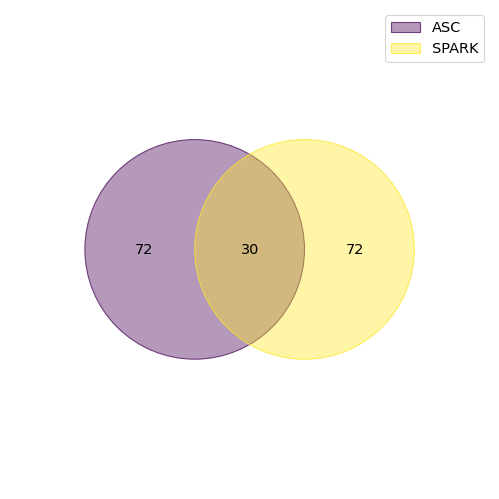

In [83]:
dat_dict = {"ASC": asc_101, "SPARK":set(SPARK["EntrezID"].values), }
plt.figure(dpi=120)
venn(dat_dict)

In [71]:
venn(SPARK_101, asc_101)

TypeError: venn_dispatch() got multiple values for argument 'func'